Let's install necessary packages

In [124]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

## Question 1
We will now implement the algorithms learnt in the class. Let's start with Perceptron

In [125]:
import numpy as np

In [126]:
np.random.seed(1337)

First we create a toy dataset in which each sample has 4 features. The output is 1 if the first feature is larger than 0.5, otherwise it's -1. We add one more feature with value 1 for bias. We learn a Perceptron model with weight $w$ as follows
$$
f(x)=\begin{cases}1\quad&\text{if}\;w^{\intercal}x \geq 0\\
-1\quad&\text{otherwise}
\end{cases}
$$

In [127]:
num_samples = 500
num_test_samples = 100
num_features = 4
x = np.random.rand(num_samples, num_features)
y = (((x.mean(1) > 0.5) - 0.5) * 2).astype(int) # we convert {0, 1} values to {-1, 1}
x = np.concatenate([x, np.ones((num_samples, 1))], 1)

Let's initialize the weight by 0. Your tasks are:
- implement the predicting function ```perceptron_predict``` that takes weights ```w``` and data ```x``` as inputs, returns the prediction of Perceptron model. 
- implement the training function in the slide (page 16) that takes weights ```w```, training data ```x``` and label ```y``` as inputs, returns the learnt weights.

In [128]:

def initialize(num_features):
    return np.zeros(num_features)

def perceptron_predict(w, x):
    ### YOUR CODE HERE
    return np.sign(np.dot(x, w.T))
    ### 

def perceptron_train(w, x, y, num_epochs=1000):
    for epoch in range(num_epochs):
        for (x_i, y_i) in zip(x, y):
            ### YOUR CODE HERE
            if y_i * perceptron_predict(w.T, x_i) <= 0:
                w += np.dot(y_i,  x_i)
            ### 
    return w



Let's train your model and check if it gives correct output for training data

In [129]:
w = initialize(num_features + 1)
w = perceptron_train(w, x, y)
assert (perceptron_predict(w, x) - y).sum() == 0

Now try on unseen test data

In [130]:
x_test = np.random.rand(num_test_samples, num_features)
y_test = (((x_test.mean(1) > 0.5) - 0.5) * 2).astype(int) # we convert {0, 1} values to {-1, 1}
x_test = np.concatenate([x_test, np.ones((num_test_samples, 1))], 1)
assert (perceptron_predict(w, x_test) == y_test).mean() > 0.9

We can also train Perceptron with gradient descent with log loss. You need to
- implement the derivative of log loss ```derivative_log_loss```, returning the derivative with respect to the weights ```w``` given training data ```x``` and labels ```y```.
- implement the training function with gradient descent ```perceptron_train_log_loss``` returning the weights learnt by gradient descent by calling the ```derivative_log_loss``` function above.

In [131]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_log_loss(w, x, y):
    ### YOUR CODE HERE
    sig = sigmoid(-y * np.dot(w.T, x))
    derivative = -y * sig * x
    return derivative
    ### 

def perceptron_train_log_loss(w, x, y, lr=0.01, num_epochs=1000):
    for epoch in range(num_epochs):
        for (x_i, y_i) in zip(x, y):
            gradient = derivative_log_loss(w, x_i, y_i)
            ### YOUR CODE HERE
            w -= lr * gradient
            ### 
    return w
w = initialize(num_features + 1)
w = perceptron_train(w, x, y)
assert (perceptron_predict(w, x) - y).sum() == 0

In [132]:
x_test = np.random.rand(num_test_samples, num_features)
y_test = (((x_test.mean(1) > 0.5) - 0.5) * 2).astype(int) # we convert {0, 1} values to {-1, 1}
x_test = np.concatenate([x_test, np.ones((num_test_samples, 1))], 1)
assert (perceptron_predict(w, x_test) == y_test).mean() > 0.9

In the lecture, we learnt that Perceptron does not work if the dataset is not linearly separable. Let's visualize that claim.

We study the moons dataset, including two half-moons in 2D space for positive and negative classes. Red dots illustrate positive samples, blue dots illustrate negative samples.

In [133]:
from sklearn.datasets import make_moons
x, y = make_moons(1000)

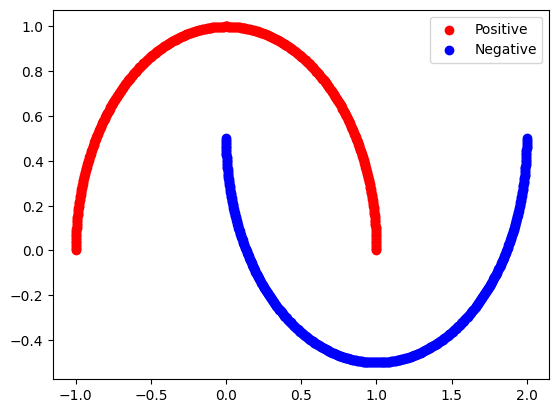

In [134]:
import matplotlib.pyplot as plt
pos = x[y == 0]
neg = x[y == 1]
plt.scatter(*pos.T, c='r', label='Positive')
plt.scatter(*neg.T, c='b', label='Negative')
plt.legend()

We train a Perceptron as above and see whether the model can separate two half-moons.

In [135]:
x_train = np.concatenate([x, np.ones((1000, 1))], 1)
w = initialize(3)
w = perceptron_train(w, x_train, y, num_epochs=1000)

In [136]:
y_pred = perceptron_predict(w, x_train)

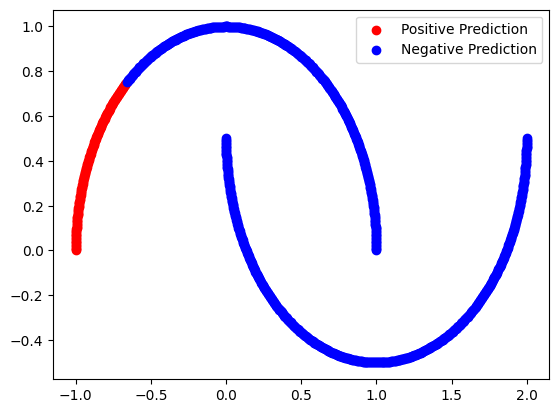

In [137]:
pos = x[y_pred == -1, :2]
neg = x[y_pred == 1, :2]
plt.scatter(*pos.T, c='r', label='Positive Prediction')
plt.scatter(*neg.T, c='b', label='Negative Prediction')
plt.legend()

## Question 2
In this question, we work on regression problem with linear regression model $Xw$ where $w$ is the weight vector you need to learn. We predefine some hyperparameters as follows

In [138]:
lr = 0.05
epochs = 10000
num_features = 3

We fit the model using least square objective function
$$
\min\|Xw-y\|^2_2
$$
Your tasks are
- complete ```fit_gd``` function that learns weights ```w``` by gradient descent given training data ```x```, labels ```y``` and current weights ```w```, with the gradient derived in written questions
- implement ```fit_closeform``` function that returns ```x``` that makes the gradient become $0$ using the formula you obtained in written questions

In [139]:
w = np.zeros(num_features)

def initialize(num_features):
    return np.zeros(num_features)

def predict(X, w):
    return np.dot(X, w)

def fit_gd(x, y, w):
    ### YOUR CODE HERE
    for _ in range(epochs):
        gd = 2 * np.dot(np.dot(x.T, x), w) - 2 * np.dot(x.T, y)
        w -= gd
    ### 
    return w

def fit_closeform(X, y, w):
    ### YOUR CODE HERE
    inv = np.linalg.inv(np.dot(X.T, X))
    w = np.dot(inv, np.dot(X.T, y))
    ### 
    return w




After learning ```w```, the prediction of the model should be similar to the label ```y```.

In [140]:
data = np.array([[ 0.1,  0.3 , -0.7  ],
        [-0.2, 0.5 ,  0.1],
        [ 0.25, 0.2, 0.  ]])


In [141]:
y = np.array([0.5 , 0.5, -0.2  ])

In [142]:
w = initialize(num_features)
w = fit_closeform(data, y, w)
assert ((predict(data, w) - y) ** 2).sum() < 1e-5

In [143]:
w = initialize(num_features)
w = fit_gd(data, y, w)
assert ((predict(data, w) - y) ** 2).sum() < 1e-5

Next, we will optimize with ridge regularization. You need to 
- implement gradient descent function ```fit_gd_ridge``` to find ```w``` with the gradient that you obtained in written questions. The hyperparameters are similar to the previous question, with a new ```ld``` value for coefficient of regularization.
- implement closeform solution ```fit_closeform_ridge``` for ```w``` as what you obtained in written questions. The hyperparameters are similar to the previous question, with a new ```ld``` value for coefficient of regularization.

In [144]:
def fit_gd_ridge(X, y, w, ld=0.2):
    ### YOUR CODE HERE
    for _ in range(epochs):
        gd = 2 * np.dot(np.dot(X.T, X), w) - 2 * np.dot(X.T, y) + 2 * ld * w
        w -= gd
    ### 
    return w

def fit_closeform_ridge(X, y, w, ld=0.2):
    ### YOUR CODE HERE
    inv = np.linalg.inv(np.dot(X.T, X) + ld * np.identity(num_features))
    w = np.dot(inv, np.dot(X.T, y))
    ### 
    return w

In [145]:
pred = np.load('ridge_pred.npy')

In [146]:
w = initialize(num_features)
w = fit_closeform_ridge(data, y, w)
assert ((predict(data, w) - pred) ** 2).sum() < 1e-5

In [147]:
w = initialize(num_features)
w = fit_gd_ridge(data, y, w)
assert ((predict(data, w) - pred) ** 2).sum() < 1e-5

Let's move to a simple toy dataset for regression, where the output is just the summation of all features. 

In [148]:
X_train = np.random.rand(1000, num_features)
y_train = X_train.sum(1)

In [149]:
w = initialize(num_features)
w = fit_closeform(X_train, y_train, w)
print('Total training error: ', ((predict(X_train, w) - y_train) ** 2).sum())

Total training error:  2.1120063622661308e-27


In [150]:
X_test = np.random.rand(100, num_features)
y_test = X_test.sum(1)
print('Total test error: ', ((predict(X_test, w) - y_test) ** 2).sum())

Total test error:  1.7528504721450437e-28
